## 1. Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏

## ÌïÑÏàò ÎùºÏù¥Î∏åÎü¨Î¶¨

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

###Ìè∞Ìä∏

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

## Îç∞Ïù¥ÌÑ∞ ÏùΩÏñ¥Ïò§Í∏∞

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# ÌååÏùº Í≤ΩÎ°ú ÏÑ§Ï†ï
train_path = "/content/drive/MyDrive/lg_aimers/train.csv"
test_path = "/content/drive/MyDrive/lg_aimers/test.csv"
excel_path = "/content/drive/MyDrive/lg_aimers/Îç∞Ïù¥ÌÑ∞ Î™ÖÏÑ∏.xlsx"

pd.set_option('display.max_columns', None)

# Îç∞Ïù¥ÌÑ∞ ÏùΩÏñ¥Ïò§Í∏∞
train_data = pd.read_csv(train_path)

train_data

ID ÏãúÏà† ÏãúÍ∏∞ ÏΩîÎìú ÏãúÏà† ÎãπÏãú ÎÇòÏù¥  ÏûÑÏã† ÏãúÎèÑ ÎòêÎäî ÎßàÏßÄÎßâ ÏûÑÏã† Í≤ΩÍ≥º Ïó∞Ïàò ÏãúÏà† Ïú†Ìòï ÌäπÏ†ï ÏãúÏà† Ïú†Ìòï  \
0       TRAIN_000000   TRZKPL  Îßå18-34ÏÑ∏                    NaN   IVF     ICSI   
1       TRAIN_000001   TRYBLT  Îßå45-50ÏÑ∏                    NaN   IVF     ICSI   
2       TRAIN_000002   TRVNRY  Îßå18-34ÏÑ∏                    NaN   IVF      IVF   
3       TRAIN_000003   TRJXFG  Îßå35-37ÏÑ∏                    NaN   IVF     ICSI   
4       TRAIN_000004   TRVNRY  Îßå18-34ÏÑ∏                    NaN   IVF     ICSI   
...              ...      ...      ...                    ...   ...      ...   
256346  TRAIN_256346   TRYBLT  Îßå18-34ÏÑ∏                    NaN   IVF     ICSI   
256347  TRAIN_256347   TRYBLT  Îßå38-39ÏÑ∏                    NaN   IVF     ICSI   
256348  TRAIN_256348   TRVNRY  Îßå35-37ÏÑ∏                    NaN   IVF     ICSI   
256349  TRAIN_256349   TRZKPL  Îßå38-39ÏÑ∏                    NaN   IVF     ICSI   
256350  TRAIN_256350   TRXQMD  Îßå35-37ÏÑ∏                    NaN   IVF      IVF   

        Î∞∞ÎûÄ ÏûêÍ∑π Ïó¨Î∂Ä    Î∞∞ÎûÄ Ïú†ÎèÑ Ïú†Ìòï  Îã®Ïùº Î∞∞ÏïÑ Ïù¥Ïãù Ïó¨Î∂Ä  Ï∞©ÏÉÅ Ï†Ñ Ïú†Ï†Ñ Í≤ÄÏÇ¨ ÏÇ¨Ïö© Ïó¨Î∂Ä  Ï∞©ÏÉÅ Ï†Ñ Ïú†Ï†Ñ ÏßÑÎã® ÏÇ¨Ïö© Ïó¨Î∂Ä  \
0              1  Í∏∞Î°ùÎêòÏßÄ ÏïäÏùÄ ÏãúÌñâ          0.0               NaN               0.0   
1              0      Ïïå Ïàò ÏóÜÏùå          0.0               NaN               0.0   
2              1  Í∏∞Î°ùÎêòÏßÄ ÏïäÏùÄ ÏãúÌñâ          0.0               NaN               0.0   
3              1  Í∏∞Î°ùÎêòÏßÄ ÏïäÏùÄ ÏãúÌñâ          0.0               NaN               0.0   
4              1  Í∏∞Î°ùÎêòÏßÄ ÏïäÏùÄ ÏãúÌñâ          0.0               NaN               0.0   
...          ...         ...          ...               ...               ...   
256346         1  Í∏∞Î°ùÎêòÏßÄ ÏïäÏùÄ ÏãúÌñâ          0.0               NaN               0.0   
256347         1  Í∏∞Î°ùÎêòÏßÄ ÏïäÏùÄ ÏãúÌñâ          0.0               NaN               0.0   
256348         1  Í∏∞Î°ùÎêòÏßÄ ÏïäÏùÄ ÏãúÌñâ          0.0               NaN               0.0   
256349         1  Í∏∞Î°ùÎêòÏßÄ ÏïäÏùÄ ÏãúÌñâ          0.0               NaN               0.0   
256350         0      Ïïå Ïàò ÏóÜÏùå          0.0               NaN               0.0   

        ÎÇ®ÏÑ± Ï£º Î∂àÏûÑ ÏõêÏù∏  ÎÇ®ÏÑ± Î∂Ä Î∂àÏûÑ ÏõêÏù∏  Ïó¨ÏÑ± Ï£º Î∂àÏûÑ ÏõêÏù∏  Ïó¨ÏÑ± Î∂Ä Î∂àÏûÑ ÏõêÏù∏  Î∂ÄÎ∂Ä Ï£º Î∂àÏûÑ ÏõêÏù∏  \
0                0           0           0           0           0   
1                0           0           0           0           0   
2                0           0           0           0           0   
3                0           0           0           0           0   
4                0           0           0           0           0   
...            ...         ...         ...         ...         ...   
256346           0           0           0           0           0   
256347           0           0           0           0           0   
256348           0           0           0           0           0   
256349           0           0           0           0           0   
256350           0           0           0           0           0   

        Î∂ÄÎ∂Ä Î∂Ä Î∂àÏûÑ ÏõêÏù∏  Î∂àÎ™ÖÌôï Î∂àÏûÑ ÏõêÏù∏  Î∂àÏûÑ ÏõêÏù∏ - ÎÇúÍ¥Ä ÏßàÌôò  Î∂àÏûÑ ÏõêÏù∏ - ÎÇ®ÏÑ± ÏöîÏù∏  Î∂àÏûÑ ÏõêÏù∏ - Î∞∞ÎûÄ Ïû•Ïï†  \
0                0          0              0              1              1   
1                0          0              0              0              0   
2                0          0              0              1              0   
3                0          0              0              1              0   
4                0          0              1              0              0   
...            ...        ...            ...            ...            ...   
256346           0          1              0              0              0   
256347           0          0              0              1              0   
256348           0          0              0         

## Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ Ï†ïÎ≥¥

In [ ]:
print("ÏàòÏπòÌòï Î≥ÄÏàò ÌÜµÍ≥Ñ")
train_data.describe()

ÏàòÏπòÌòï Î≥ÄÏàò ÌÜµÍ≥Ñ


ÏûÑÏã† ÏãúÎèÑ ÎòêÎäî ÎßàÏßÄÎßâ ÏûÑÏã† Í≤ΩÍ≥º Ïó∞Ïàò       Î∞∞ÎûÄ ÏûêÍ∑π Ïó¨Î∂Ä    Îã®Ïùº Î∞∞ÏïÑ Ïù¥Ïãù Ïó¨Î∂Ä  Ï∞©ÏÉÅ Ï†Ñ Ïú†Ï†Ñ Í≤ÄÏÇ¨ ÏÇ¨Ïö© Ïó¨Î∂Ä  \
count            9370.000000  256351.000000  250060.000000            2718.0   
mean                9.270651       0.771286       0.233476               1.0   
std                 3.550313       0.420005       0.423043               0.0   
min                 0.000000       0.000000       0.000000               1.0   
25%                 7.000000       1.000000       0.000000               1.0   
50%                 9.000000       1.000000       0.000000               1.0   
75%                11.000000       1.000000       0.000000               1.0   
max                20.000000       1.000000       1.000000               1.0   

       Ï∞©ÏÉÅ Ï†Ñ Ïú†Ï†Ñ ÏßÑÎã® ÏÇ¨Ïö© Ïó¨Î∂Ä     ÎÇ®ÏÑ± Ï£º Î∂àÏûÑ ÏõêÏù∏     ÎÇ®ÏÑ± Î∂Ä Î∂àÏûÑ ÏõêÏù∏     Ïó¨ÏÑ± Ï£º Î∂àÏûÑ ÏõêÏù∏  \
count     250060.000000  256351.000000  256351.000000  256351.000000   
mean           0.012781       0.028516       0.013115       0.030724   
std            0.112328       0.166441       0.113767       0.172568   
min            0.000000       0.000000       0.000000       0.000000   
25%            0.000000       0.000000       0.000000       0.000000   
50%            0.000000       0.000000       0.000000       0.000000   
75%            0.000000       0.000000       0.000000       0.000000   
max            1.000000       1.000000       1.000000       1.000000   

          Ïó¨ÏÑ± Î∂Ä Î∂àÏûÑ ÏõêÏù∏     Î∂ÄÎ∂Ä Ï£º Î∂àÏûÑ ÏõêÏù∏     Î∂ÄÎ∂Ä Î∂Ä Î∂àÏûÑ ÏõêÏù∏      Î∂àÎ™ÖÌôï Î∂àÏûÑ ÏõêÏù∏  \
count  256351.000000  256351.000000  256351.000000  256351.000000   
mean        0.012432       0.033068       0.008765       0.250730   
std         0.110805       0.178814       0.093212       0.433434   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       1.000000   
max         1.000000       1.000000       1.000000       1.000000   

       Î∂àÏûÑ ÏõêÏù∏ - ÎÇúÍ¥Ä ÏßàÌôò  Î∂àÏûÑ ÏõêÏù∏ - ÎÇ®ÏÑ± ÏöîÏù∏  Î∂àÏûÑ ÏõêÏù∏ - Î∞∞ÎûÄ Ïû•Ïï†  Î∂àÏûÑ ÏõêÏù∏ - Ïó¨ÏÑ± ÏöîÏù∏  \
count  256351.000000  256351.000000  256351.000000       256351.0   
mean        0.138704       0.372403       0.130392            0.0   
std         0.345638       0.483446       0.336734            0.0   
min         0.000000       0.000000       0.000000            0.0   
25%         0.000000       0.000000       0.000000            0.0   
50%         0.000000       0.000000       0.000000            0.0   
75%         0.000000       1.000000       0.000000            0.0   
max         1.000000       1.000000       1.000000            0.0   

       Î∂àÏûÑ ÏõêÏù∏ - ÏûêÍ∂ÅÍ≤ΩÎ∂Ä Î¨∏Ï†ú  Î∂àÏûÑ ÏõêÏù∏ - ÏûêÍ∂ÅÎÇ¥ÎßâÏ¶ù  Î∂àÏûÑ ÏõêÏù∏ - Ï†ïÏûê ÎÜçÎèÑ  Î∂àÏûÑ ÏõêÏù∏ - Ï†ïÏûê Î©¥Ïó≠ÌïôÏ†Å ÏöîÏù∏  \
count    256351.000000  256351.000000  256351.000000       256351.000000   
mean          0.000039       0.071394       0.001077            0.000004   
std           0.006246       0.257483       0.032795            0.001975   
min           0.000000       0.000000       0.000000            0.000000   
25%           0.000000       0.000000       0.000000            0.000000   
50%           0.000000       0.000000       0.000000            0.000000   
75%           0.000000       0.000000       0.000000            0.000000   
max           1.000000       1.000000       1.000000            1.000000   

       Î∂àÏûÑ ÏõêÏù∏ - Ï†ïÏûê Ïö¥ÎèôÏÑ±  Î∂àÏûÑ ÏõêÏù∏ - Ï†ïÏûê ÌòïÌÉú      Ï¥ù ÏÉùÏÑ± Î∞∞ÏïÑ Ïàò     ÎØ∏ÏÑ∏Ï£ºÏûÖÎêú ÎÇúÏûê Ïàò  \
count   256351.000000  256351.000000  250060.000000  250060.000000   
mean         0.000378       0.000558       5.061145       4.170799   
std          0.019449       0.023612       4.664337       5.625943   
min          0.000000   

In [ ]:
print("Î≤îÏ£ºÌòï Î≥ÄÏàò ÌÜµÍ≥Ñ")
train_data.describe(include="object")

Î≤îÏ£ºÌòï Î≥ÄÏàò ÌÜµÍ≥Ñ


ID ÏãúÏà† ÏãúÍ∏∞ ÏΩîÎìú ÏãúÏà† ÎãπÏãú ÎÇòÏù¥   ÏãúÏà† Ïú†Ìòï ÌäπÏ†ï ÏãúÏà† Ïú†Ìòï    Î∞∞ÎûÄ Ïú†ÎèÑ Ïú†Ìòï  \
count         256351   256351   256351  256351   256349      256351   
unique        256351        7        7       2       24           4   
top     TRAIN_000000   TRDQAZ  Îßå18-34ÏÑ∏     IVF     ICSI  Í∏∞Î°ùÎêòÏßÄ ÏïäÏùÄ ÏãúÌñâ   
freq               1    38969   102476  250060   122368      194432   

       Î∞∞ÏïÑ ÏÉùÏÑ± Ï£ºÏöî Ïù¥Ïú† Ï¥ù ÏãúÏà† ÌöüÏàò ÌÅ¥Î¶¨Îãâ ÎÇ¥ Ï¥ù ÏãúÏà† ÌöüÏàò IVF ÏãúÏà† ÌöüÏàò DI ÏãúÏà† ÌöüÏàò Ï¥ù ÏûÑÏã† ÌöüÏàò IVF ÏûÑÏã† ÌöüÏàò  \
count       250060  256351        256351    256351   256351  256351    256351   
unique          13       7             7         7        7       7         7   
top         ÌòÑÏû¨ ÏãúÏà†Ïö©      0Ìöå            0Ìöå        0Ìöå       0Ìöå      0Ìöå        0Ìöå   
freq        233732   97599        121675    103934   242464  205426    208292   

       DI ÏûÑÏã† ÌöüÏàò Ï¥ù Ï∂úÏÇ∞ ÌöüÏàò IVF Ï∂úÏÇ∞ ÌöüÏàò DI Ï∂úÏÇ∞ ÌöüÏàò   ÎÇúÏûê Ï∂úÏ≤ò   Ï†ïÏûê Ï∂úÏ≤ò ÎÇúÏûê Í∏∞Ï¶ùÏûê ÎÇòÏù¥ Ï†ïÏûê Í∏∞Ï¶ùÏûê ÎÇòÏù¥  
count    256351  256351    256351   256351  256351  256351    256351    256351  
unique        6       7         6        5       3       4         5         7  
top          0Ìöå      0Ìöå        0Ìöå       0Ìöå   Î≥∏Ïù∏ Ï†úÍ≥µ  Î∞∞Ïö∞Ïûê Ï†úÍ≥µ    Ïïå Ïàò ÏóÜÏùå    Ïïå Ïàò ÏóÜÏùå  
freq     253302  218555    220831   254009  234291  229199    242381    230518

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256351 entries, 0 to 256350
Data columns (total 69 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     256351 non-null  object 
 1   ÏãúÏà† ÏãúÍ∏∞ ÏΩîÎìú               256351 non-null  object 
 2   ÏãúÏà† ÎãπÏãú ÎÇòÏù¥               256351 non-null  object 
 3   ÏûÑÏã† ÏãúÎèÑ ÎòêÎäî ÎßàÏßÄÎßâ ÏûÑÏã† Í≤ΩÍ≥º Ïó∞Ïàò  9370 non-null    float64
 4   ÏãúÏà† Ïú†Ìòï                  256351 non-null  object 
 5   ÌäπÏ†ï ÏãúÏà† Ïú†Ìòï               256349 non-null  object 
 6   Î∞∞ÎûÄ ÏûêÍ∑π Ïó¨Î∂Ä               256351 non-null  int64  
 7   Î∞∞ÎûÄ Ïú†ÎèÑ Ïú†Ìòï               256351 non-null  object 
 8   Îã®Ïùº Î∞∞ÏïÑ Ïù¥Ïãù Ïó¨Î∂Ä            250060 non-null  float64
 9   Ï∞©ÏÉÅ Ï†Ñ Ïú†Ï†Ñ Í≤ÄÏÇ¨ ÏÇ¨Ïö© Ïó¨Î∂Ä       2718 non-null    float64
 10  Ï∞©ÏÉÅ Ï†Ñ Ïú†Ï†Ñ ÏßÑÎã® ÏÇ¨Ïö© Ïó¨Î∂Ä       250060 non-null  float64
 11  ÎÇ®ÏÑ± Ï£º Î∂àÏûÑ ÏõêÏù∏             

In [ ]:
train_data.shape

(256351, 69)

In [ ]:
train_data.columns

Index(['ID', 'ÏãúÏà† ÏãúÍ∏∞ ÏΩîÎìú', 'ÏãúÏà† ÎãπÏãú ÎÇòÏù¥', 'ÏûÑÏã† ÏãúÎèÑ ÎòêÎäî ÎßàÏßÄÎßâ ÏûÑÏã† Í≤ΩÍ≥º Ïó∞Ïàò', 'ÏãúÏà† Ïú†Ìòï',
       'ÌäπÏ†ï ÏãúÏà† Ïú†Ìòï', 'Î∞∞ÎûÄ ÏûêÍ∑π Ïó¨Î∂Ä', 'Î∞∞ÎûÄ Ïú†ÎèÑ Ïú†Ìòï', 'Îã®Ïùº Î∞∞ÏïÑ Ïù¥Ïãù Ïó¨Î∂Ä', 'Ï∞©ÏÉÅ Ï†Ñ Ïú†Ï†Ñ Í≤ÄÏÇ¨ ÏÇ¨Ïö© Ïó¨Î∂Ä',
       'Ï∞©ÏÉÅ Ï†Ñ Ïú†Ï†Ñ ÏßÑÎã® ÏÇ¨Ïö© Ïó¨Î∂Ä', 'ÎÇ®ÏÑ± Ï£º Î∂àÏûÑ ÏõêÏù∏', 'ÎÇ®ÏÑ± Î∂Ä Î∂àÏûÑ ÏõêÏù∏', 'Ïó¨ÏÑ± Ï£º Î∂àÏûÑ ÏõêÏù∏',
       'Ïó¨ÏÑ± Î∂Ä Î∂àÏûÑ ÏõêÏù∏', 'Î∂ÄÎ∂Ä Ï£º Î∂àÏûÑ ÏõêÏù∏', 'Î∂ÄÎ∂Ä Î∂Ä Î∂àÏûÑ ÏõêÏù∏', 'Î∂àÎ™ÖÌôï Î∂àÏûÑ ÏõêÏù∏', 'Î∂àÏûÑ ÏõêÏù∏ - ÎÇúÍ¥Ä ÏßàÌôò',
       'Î∂àÏûÑ ÏõêÏù∏ - ÎÇ®ÏÑ± ÏöîÏù∏', 'Î∂àÏûÑ ÏõêÏù∏ - Î∞∞ÎûÄ Ïû•Ïï†', 'Î∂àÏûÑ ÏõêÏù∏ - Ïó¨ÏÑ± ÏöîÏù∏', 'Î∂àÏûÑ ÏõêÏù∏ - ÏûêÍ∂ÅÍ≤ΩÎ∂Ä Î¨∏Ï†ú',
       'Î∂àÏûÑ ÏõêÏù∏ - ÏûêÍ∂ÅÎÇ¥ÎßâÏ¶ù', 'Î∂àÏûÑ ÏõêÏù∏ - Ï†ïÏûê ÎÜçÎèÑ', 'Î∂àÏûÑ ÏõêÏù∏ - Ï†ïÏûê Î©¥Ïó≠ÌïôÏ†Å ÏöîÏù∏',
       'Î∂àÏûÑ ÏõêÏù∏ - Ï†ïÏûê Ïö¥ÎèôÏÑ±', 'Î∂àÏûÑ ÏõêÏù∏ - Ï†ïÏûê ÌòïÌÉú', 'Î∞∞ÏïÑ ÏÉùÏÑ± Ï£ºÏöî Ïù¥Ïú†', 'Ï¥ù ÏãúÏà† ÌöüÏàò',
       'ÌÅ¥Î¶¨Îãâ ÎÇ¥ Ï¥ù ÏãúÏà† ÌöüÏ

In [ ]:
train_data.dtypes

ID                        object
ÏãúÏà† ÏãúÍ∏∞ ÏΩîÎìú                  object
ÏãúÏà† ÎãπÏãú ÎÇòÏù¥                  object
ÏûÑÏã† ÏãúÎèÑ ÎòêÎäî ÎßàÏßÄÎßâ ÏûÑÏã† Í≤ΩÍ≥º Ïó∞Ïàò    float64
ÏãúÏà† Ïú†Ìòï                     object
                          ...   
ÎÇúÏûê Ìï¥Îèô Í≤ΩÍ≥ºÏùº                float64
ÎÇúÏûê ÌòºÌï© Í≤ΩÍ≥ºÏùº                float64
Î∞∞ÏïÑ Ïù¥Ïãù Í≤ΩÍ≥ºÏùº                float64
Î∞∞ÏïÑ Ìï¥Îèô Í≤ΩÍ≥ºÏùº                float64
ÏûÑÏã† ÏÑ±Í≥µ Ïó¨Î∂Ä                   int64
Length: 69, dtype: object

In [ ]:
print("Ï§ëÎ≥µ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò:", train_data.duplicated().sum())

Ï§ëÎ≥µ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: 0


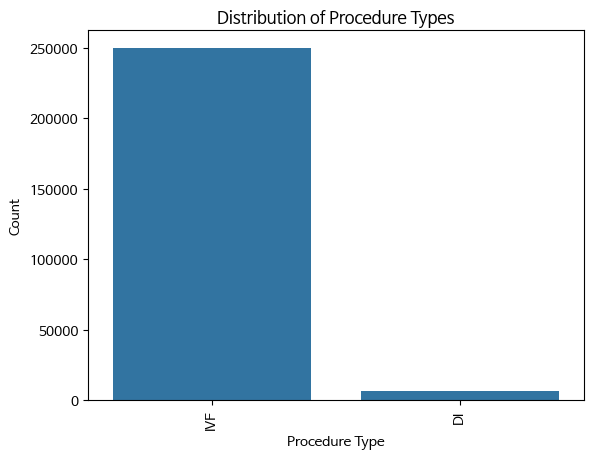

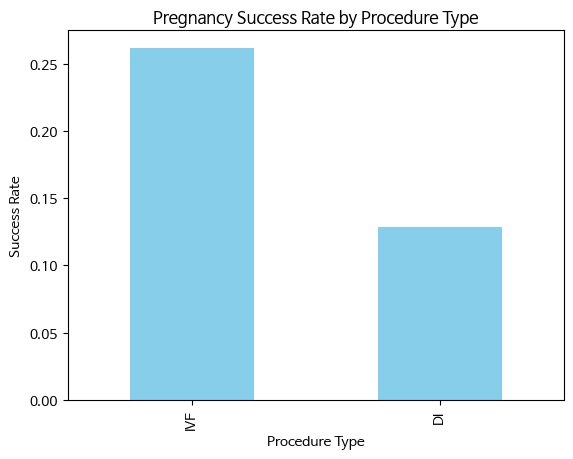

In [ ]:
# 'ÏãúÏà† Ïú†Ìòï' Î∂ÑÌè¨ ÌôïÏù∏
sns.countplot(x=train_data["ÏãúÏà† Ïú†Ìòï"], order=train_data["ÏãúÏà† Ïú†Ìòï"].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel("Procedure Type")
plt.ylabel("Count")
plt.title("Distribution of Procedure Types")
plt.show()

# ÏãúÏà† Ïú†ÌòïÎ≥Ñ ÏûÑÏã† ÏÑ±Í≥µÎ•† ÎπÑÍµê
success_rate = train_data.groupby("ÏãúÏà† Ïú†Ìòï")["ÏûÑÏã† ÏÑ±Í≥µ Ïó¨Î∂Ä"].mean()
success_rate.sort_values(ascending=False).plot(kind="bar", color="skyblue")
plt.xlabel("Procedure Type")
plt.ylabel("Success Rate")
plt.title("Pregnancy Success Rate by Procedure Type")
plt.show()

## Ï§ëÏöîÎèÑ ÎÜíÏùÄ Ïª¨Îüº ÌôïÏù∏

In [ ]:
# ÌÉÄÍ≤ü Î≥ÄÏàò ÌôïÏù∏
print(train_data["ÏûÑÏã† ÏÑ±Í≥µ Ïó¨Î∂Ä"].value_counts())  # 0(Ïã§Ìå®) vs 1(ÏÑ±Í≥µ) Í∞úÏàò ÌôïÏù∏
print(train_data["ÏûÑÏã† ÏÑ±Í≥µ Ïó¨Î∂Ä"].value_counts(normalize=True))  # ÎπÑÏú® ÌôïÏù∏

ÏûÑÏã† ÏÑ±Í≥µ Ïó¨Î∂Ä
0    190123
1     66228
Name: count, dtype: int64
ÏûÑÏã† ÏÑ±Í≥µ Ïó¨Î∂Ä
0    0.741651
1    0.258349
Name: proportion, dtype: float64


<ipython-input-24-1d67196db5a9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_data["ÏûÑÏã† ÏÑ±Í≥µ Ïó¨Î∂Ä"], palette="pastel")  # 0Í≥º 1Ïùò Î∂ÑÌè¨


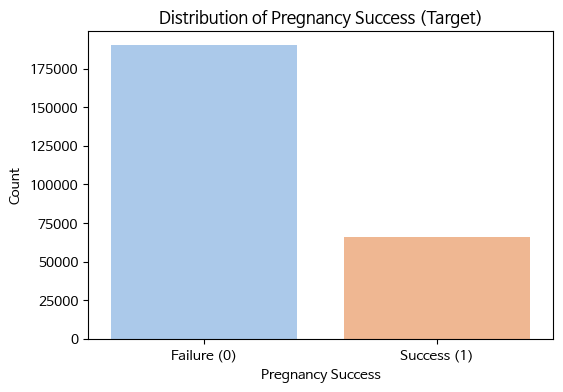

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x=train_data["ÏûÑÏã† ÏÑ±Í≥µ Ïó¨Î∂Ä"], palette="pastel")  # 0Í≥º 1Ïùò Î∂ÑÌè¨
plt.title("Distribution of Pregnancy Success (Target)")  # Í∑∏ÎûòÌîÑ Ï†úÎ™©
plt.xlabel("Pregnancy Success")  # xÏ∂ï - ÏûÑÏã† ÏÑ±Í≥µ Ïó¨Î∂Ä
plt.ylabel("Count")  # yÏ∂ï - Í∞úÏàò
plt.xticks(ticks=[0, 1], labels=["Failure (0)", "Success (1)"])  # xÏ∂ï ÎùºÎ≤® ÏÑ§Ï†ï
plt.show()

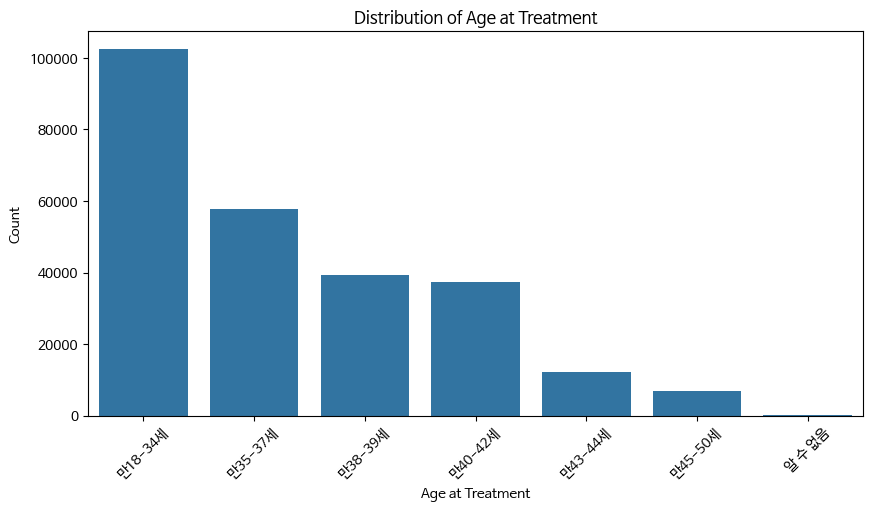

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(x=train_data["ÏãúÏà† ÎãπÏãú ÎÇòÏù¥"], order=train_data["ÏãúÏà† ÎãπÏãú ÎÇòÏù¥"].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel("Age at Treatment")
plt.ylabel("Count")
plt.title("Distribution of Age at Treatment")
plt.show()

In [ ]:
# ÎÇ®ÏÑ± Î∂àÏûÑ ÏõêÏù∏Ïùò Î∂ÑÌè¨ ÌôïÏù∏
male_infertility_counts = train_data["Î∂àÏûÑ ÏõêÏù∏ - ÎÇ®ÏÑ± ÏöîÏù∏"].value_counts()
male_infertility_ratio = train_data["Î∂àÏûÑ ÏõêÏù∏ - ÎÇ®ÏÑ± ÏöîÏù∏"].value_counts(normalize=True) * 100

# Ï∂úÎ†•
print("ÎÇ®ÏÑ± Î∂àÏûÑ ÏõêÏù∏ Î∂ÑÌè¨ (Ïπ¥Ïö¥Ìä∏)")
print(male_infertility_counts)
print("\nÎÇ®ÏÑ± Î∂àÏûÑ ÏõêÏù∏ ÎπÑÏú® (%)")
print(male_infertility_ratio)

ÎÇ®ÏÑ± Î∂àÏûÑ ÏõêÏù∏ Î∂ÑÌè¨ (Ïπ¥Ïö¥Ìä∏)
Î∂àÏûÑ ÏõêÏù∏ - ÎÇ®ÏÑ± ÏöîÏù∏
0    160885
1     95466
Name: count, dtype: int64

ÎÇ®ÏÑ± Î∂àÏûÑ ÏõêÏù∏ ÎπÑÏú® (%)
Î∂àÏûÑ ÏõêÏù∏ - ÎÇ®ÏÑ± ÏöîÏù∏
0    62.759654
1    37.240346
Name: proportion, dtype: float64


<ipython-input-33-3903613f5d50>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x="Î∂àÏûÑ ÏõêÏù∏ - ÎÇ®ÏÑ± ÏöîÏù∏", palette="coolwarm")


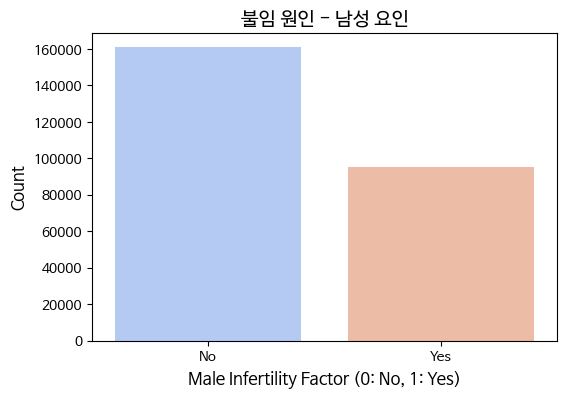

In [ ]:
# Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï
plt.figure(figsize=(6, 4))
sns.countplot(data=train_data, x="Î∂àÏûÑ ÏõêÏù∏ - ÎÇ®ÏÑ± ÏöîÏù∏", palette="coolwarm")

# Í∑∏ÎûòÌîÑ Ï†úÎ™© Î∞è ÎùºÎ≤®
plt.title("Î∂àÏûÑ ÏõêÏù∏ - ÎÇ®ÏÑ± ÏöîÏù∏", fontsize=14)
plt.xlabel("Male Infertility Factor (0: No, 1: Yes)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])  # XÏ∂ï Î†àÏù¥Î∏î Î≥ÄÍ≤Ω
plt.show()

In [ ]:
# Î≤îÏ£ºÌòï Î≥ÄÏàòÎßå Ï∂îÏ∂úÌïòÏó¨ Í≥†Ïú†Í∞í Í∞úÏàò ÌôïÏù∏
categorical_cols = train_data.select_dtypes(include=["object"]).columns

# Í∞Å Î≤îÏ£ºÌòï Î≥ÄÏàòÎ≥Ñ Ïú†ÎãàÌÅ¨Ìïú Í∞í Í∞úÏàò Ï∂úÎ†•
unique_counts = train_data[categorical_cols].nunique().sort_values(ascending=False)
print(unique_counts)

ID               256351
ÌäπÏ†ï ÏãúÏà† Ïú†Ìòï             24
Î∞∞ÏïÑ ÏÉùÏÑ± Ï£ºÏöî Ïù¥Ïú†          13
IVF ÏãúÏà† ÌöüÏàò             7
Ï¥ù Ï∂úÏÇ∞ ÌöüÏàò               7
IVF ÏûÑÏã† ÌöüÏàò             7
Ï¥ù ÏûÑÏã† ÌöüÏàò               7
ÏãúÏà† ÏãúÍ∏∞ ÏΩîÎìú              7
DI ÏãúÏà† ÌöüÏàò              7
ÌÅ¥Î¶¨Îãâ ÎÇ¥ Ï¥ù ÏãúÏà† ÌöüÏàò         7
Ï¥ù ÏãúÏà† ÌöüÏàò               7
ÏãúÏà† ÎãπÏãú ÎÇòÏù¥              7
Ï†ïÏûê Í∏∞Ï¶ùÏûê ÎÇòÏù¥             7
DI ÏûÑÏã† ÌöüÏàò              6
IVF Ï∂úÏÇ∞ ÌöüÏàò             6
DI Ï∂úÏÇ∞ ÌöüÏàò              5
ÎÇúÏûê Í∏∞Ï¶ùÏûê ÎÇòÏù¥             5
Î∞∞ÎûÄ Ïú†ÎèÑ Ïú†Ìòï              4
Ï†ïÏûê Ï∂úÏ≤ò                 4
ÎÇúÏûê Ï∂úÏ≤ò                 3
ÏãúÏà† Ïú†Ìòï                 2
dtype: int64


In [ ]:
import pandas as pd

# Ïª¨ÎüºÎ≥Ñ Í≤∞Ï∏°Ïπò Í∞úÏàò ÌôïÏù∏
missing_values = train_data.isnull().sum()

# Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÎåÄÎπÑ Í≤∞Ï∏°Ïπò ÎπÑÏú® Í≥ÑÏÇ∞
missing_ratio = (missing_values / len(train_data)) * 100

# Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Ïª¨ÎüºÎßå Ï∂úÎ†•
missing_data = pd.DataFrame({'Missing Count': missing_values, 'Missing Ratio (%)': missing_ratio})
missing_data = missing_data[missing_data['Missing Count'] > 0].sort_values(by="Missing Ratio (%)", ascending=False)

# Í≤∞Í≥º Ï∂úÎ†•
print(missing_data)

                       Missing Count  Missing Ratio (%)
ÎÇúÏûê Ìï¥Îèô Í≤ΩÍ≥ºÏùº                     254915          99.439831
PGS ÏãúÏà† Ïó¨Î∂Ä                     254422          99.247516
PGD ÏãúÏà† Ïó¨Î∂Ä                     254172          99.149994
Ï∞©ÏÉÅ Ï†Ñ Ïú†Ï†Ñ Í≤ÄÏÇ¨ ÏÇ¨Ïö© Ïó¨Î∂Ä              253633          98.939735
ÏûÑÏã† ÏãúÎèÑ ÎòêÎäî ÎßàÏßÄÎßâ ÏûÑÏã† Í≤ΩÍ≥º Ïó∞Ïàò         246981          96.344855
Î∞∞ÏïÑ Ìï¥Îèô Í≤ΩÍ≥ºÏùº                     215982          84.252451
ÎÇúÏûê Ï±ÑÏ∑® Í≤ΩÍ≥ºÏùº                      57488          22.425503
ÎÇúÏûê ÌòºÌï© Í≤ΩÍ≥ºÏùº                      53735          20.961494
Î∞∞ÏïÑ Ïù¥Ïãù Í≤ΩÍ≥ºÏùº                      43566          16.994667
Ï¥ù ÏÉùÏÑ± Î∞∞ÏïÑ Ïàò                       6291           2.454057
Í∏∞Ï¶ùÏûê Ï†ïÏûêÏôÄ ÌòºÌï©Îêú ÎÇúÏûê Ïàò                6291           2.454057
Îã®Ïùº Î∞∞ÏïÑ Ïù¥Ïãù Ïó¨Î∂Ä                     6291           2.454057
Ï∞©ÏÉÅ Ï†Ñ Ïú†Ï†Ñ ÏßÑÎã® ÏÇ¨Ïö© Ïó¨Î∂Ä                6291           2.454057
Î∞∞Ï

üìå Î∞∞ÎûÄ Ïû•Ïï† Î∂ÑÌè¨ (Ïπ¥Ïö¥Ìä∏)
Î∂àÏûÑ ÏõêÏù∏ - Î∞∞ÎûÄ Ïû•Ïï†
0    222925
1     33426
Name: count, dtype: int64

üìå Î∞∞ÎûÄ Ïû•Ïï† ÎπÑÏú® (%)
Î∂àÏûÑ ÏõêÏù∏ - Î∞∞ÎûÄ Ïû•Ïï†
0    86.960847
1    13.039153
Name: proportion, dtype: float64


<ipython-input-32-28856eb1f6c5>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count_values.index, y=count_values.values, palette=["lightblue", "salmon"])


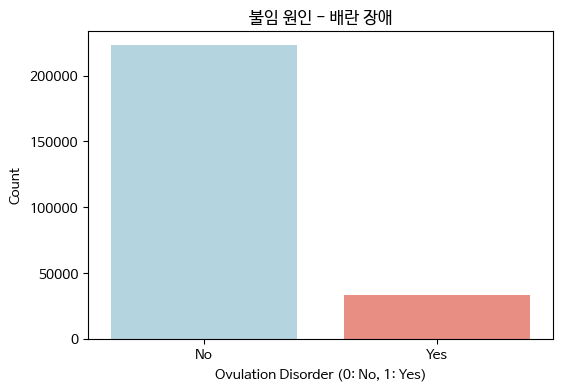

In [ ]:
# 'Î∂àÏûÑ ÏõêÏù∏ - Î∞∞ÎûÄ Ïû•Ïï†' Î≥ÄÏàòÎ™Ö ÌôïÏù∏
column_name = "Î∂àÏûÑ ÏõêÏù∏ - Î∞∞ÎûÄ Ïû•Ïï†"

# Í∞í Í∞úÏàò ÌôïÏù∏
count_values = train_data[column_name].value_counts()
proportion_values = train_data[column_name].value_counts(normalize=True) * 100

# Ï∂úÎ†•
print("üìå Î∞∞ÎûÄ Ïû•Ïï† Î∂ÑÌè¨ (Ïπ¥Ïö¥Ìä∏)")
print(count_values)

print("\nüìå Î∞∞ÎûÄ Ïû•Ïï† ÎπÑÏú® (%)")
print(proportion_values)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(6,4))
sns.barplot(x=count_values.index, y=count_values.values, palette=["lightblue", "salmon"])
plt.xticks([0,1], ["No", "Yes"])
plt.xlabel("Ovulation Disorder (0: No, 1: Yes)")
plt.ylabel("Count")
plt.title("Î∂àÏûÑ ÏõêÏù∏ - Î∞∞ÎûÄ Ïû•Ïï†")
plt.show()

üìä 'Î∂àÏûÑ ÏõêÏù∏ - Ïó¨ÏÑ± ÏöîÏù∏' Î∂ÑÌè¨ (Ïπ¥Ïö¥Ìä∏)
Î∂àÏûÑ ÏõêÏù∏ - Ïó¨ÏÑ± ÏöîÏù∏
0    256351
Name: count, dtype: int64

üìä '{column_name}' ÎπÑÏú® (%)
Î∂àÏûÑ ÏõêÏù∏ - Ïó¨ÏÑ± ÏöîÏù∏
0    100.0
Name: count, dtype: float64


<ipython-input-31-aa5e62682c9c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette=["lightblue", "salmon"])
<ipython-input-31-aa5e62682c9c>:20: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.barplot(x=value_counts.index, y=value_counts.values, palette=["lightblue", "salmon"])


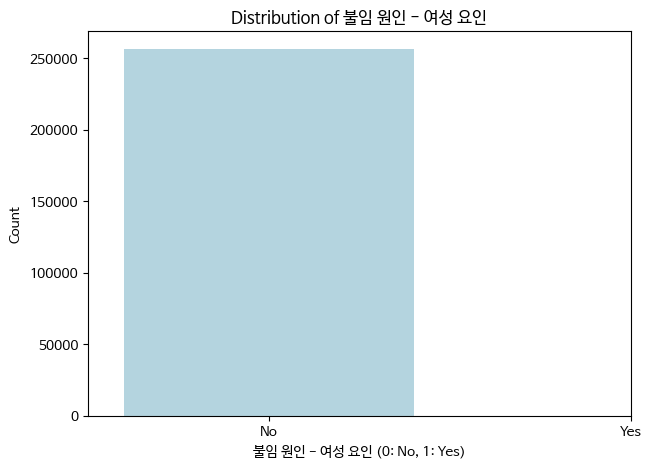

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú (train_dataÍ∞Ä Ïù¥ÎØ∏ Î°úÎìúÎêòÏñ¥ ÏûàÎã§Í≥† Í∞ÄÏ†ï)
column_name = "Î∂àÏûÑ ÏõêÏù∏ - Ïó¨ÏÑ± ÏöîÏù∏"

# Î∂ÑÌè¨ ÌôïÏù∏ (Ïπ¥Ïö¥Ìä∏)
value_counts = train_data[column_name].value_counts().sort_index()
proportion = (value_counts / value_counts.sum()) * 100

# Í≤∞Í≥º Ï∂úÎ†•
print(f"üìä '{column_name}' Î∂ÑÌè¨ (Ïπ¥Ïö¥Ìä∏)")
print(value_counts)
print("\nüìä '{column_name}' ÎπÑÏú® (%)")
print(proportion)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(7,5))
sns.barplot(x=value_counts.index, y=value_counts.values, palette=["lightblue", "salmon"])
plt.xlabel(f"{column_name} (0: No, 1: Yes)")
plt.ylabel("Count")
plt.title(f"Distribution of {column_name}")
plt.xticks(ticks=[0,1], labels=["No", "Yes"])
plt.show()

<ipython-input-34-b90751daf207>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index.astype(str), y=value_counts.values, palette=["skyblue", "salmon"])


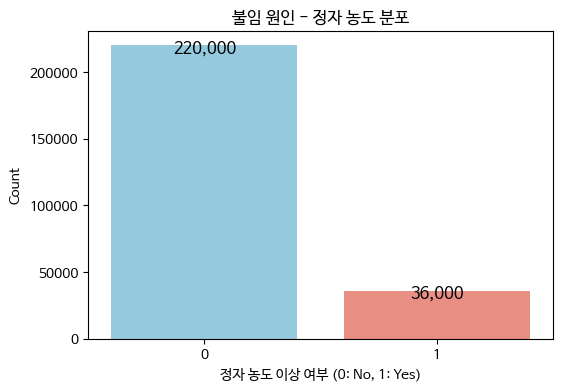

   Î∂àÏûÑ ÏõêÏù∏ - Ï†ïÏûê ÎÜçÎèÑ   Count  Percentage (%)
0              0  220000         85.9375
1              1   36000         14.0625


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ‚úÖ ÏòàÏ†ú Îç∞Ïù¥ÌÑ∞ (Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö© Ïãú dfÎ•º Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú Î≥ÄÍ≤Ω)
df = pd.DataFrame({
    "Î∂àÏûÑ ÏõêÏù∏ - Ï†ïÏûê ÎÜçÎèÑ": [0] * 220000 + [1] * 36000  # ÏòàÏ†ú Îç∞Ïù¥ÌÑ∞ (0: 85.94%, 1: 14.06%)
})

# ‚úÖ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ Í≥ÑÏÇ∞
value_counts = df["Î∂àÏûÑ ÏõêÏù∏ - Ï†ïÏûê ÎÜçÎèÑ"].value_counts().sort_index()
percentages = (value_counts / value_counts.sum()) * 100

# ‚úÖ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ï†ïÎ¶¨
summary_df = pd.DataFrame({
    "Î∂àÏûÑ ÏõêÏù∏ - Ï†ïÏûê ÎÜçÎèÑ": value_counts.index,
    "Count": value_counts.values,
    "Percentage (%)": percentages.values
}).sort_values("Î∂àÏûÑ ÏõêÏù∏ - Ï†ïÏûê ÎÜçÎèÑ")

# ‚úÖ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(6, 4))
sns.barplot(x=value_counts.index.astype(str), y=value_counts.values, palette=["skyblue", "salmon"])
plt.xlabel("Ï†ïÏûê ÎÜçÎèÑ Ïù¥ÏÉÅ Ïó¨Î∂Ä (0: No, 1: Yes)")
plt.ylabel("Count")
plt.title("Î∂àÏûÑ ÏõêÏù∏ - Ï†ïÏûê ÎÜçÎèÑ Î∂ÑÌè¨")

# ‚úÖ Í∑∏ÎûòÌîÑ ÏúÑÏóê Ïà´Ïûê ÌëúÏãú
for i, v in enumerate(value_counts.values):
    plt.text(i, v - 5000, f"{v:,}", ha='center', fontsize=12)

plt.show()

# ‚úÖ Îç∞Ïù¥ÌÑ∞ ÏöîÏïΩ Ï∂úÎ†•
print(summary_df)

üìä 'Î∂àÏûÑ ÏõêÏù∏ - Ï†ïÏûê Ïö¥ÎèôÏÑ±' Î∂ÑÌè¨ (Ïπ¥Ïö¥Ìä∏)
Î∂àÏûÑ ÏõêÏù∏ - Ï†ïÏûê Ïö¥ÎèôÏÑ±
0    256254
1        97
Name: count, dtype: int64

üìä '{column_name}' ÎπÑÏú® (%)
Î∂àÏûÑ ÏõêÏù∏ - Ï†ïÏûê Ïö¥ÎèôÏÑ±
0    99.962161
1     0.037839
Name: count, dtype: float64


<ipython-input-35-7d008a7c3c56>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette=["lightblue", "salmon"])


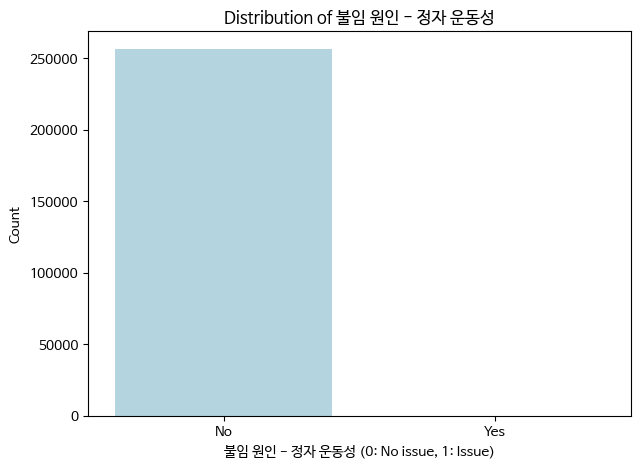

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Î≥ÄÏàòÎ™Ö ÏÑ§Ï†ï
column_name = "Î∂àÏûÑ ÏõêÏù∏ - Ï†ïÏûê Ïö¥ÎèôÏÑ±"

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ ÌôïÏù∏
value_counts = train_data[column_name].value_counts().sort_index()
proportion = (value_counts / value_counts.sum()) * 100

# Í≤∞Í≥º Ï∂úÎ†•
print(f"üìä '{column_name}' Î∂ÑÌè¨ (Ïπ¥Ïö¥Ìä∏)")
print(value_counts)
print("\nüìä '{column_name}' ÎπÑÏú® (%)")
print(proportion)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(7,5))
sns.barplot(x=value_counts.index, y=value_counts.values, palette=["lightblue", "salmon"])
plt.xlabel(f"{column_name} (0: No issue, 1: Issue)")
plt.ylabel("Count")
plt.title(f"Distribution of {column_name}")
plt.xticks(ticks=[0,1], labels=["No", "Yes"])
plt.show()

In [ ]:
# Ï¥ù ÏãúÏà† ÌöüÏàò Î∂ÑÌè¨ ÌôïÏù∏
count_data = train_data['Ï¥ù ÏãúÏà† ÌöüÏàò'].value_counts().sort_index()
proportion_data = (count_data / count_data.sum()) * 100

# Í≤∞Í≥º Ï∂úÎ†•
print("'Ï¥ù ÏãúÏà† ÌöüÏàò' Î∂ÑÌè¨ (Ïπ¥Ïö¥Ìä∏)")
display(count_data)

print("\n'Ï¥ù ÏãúÏà† ÌöüÏàò' ÎπÑÏú® (%)")
display(proportion_data)

'Ï¥ù ÏãúÏà† ÌöüÏàò' Î∂ÑÌè¨ (Ïπ¥Ïö¥Ìä∏)


Ï¥ù ÏãúÏà† ÌöüÏàò
0Ìöå       97599
1Ìöå       56819
2Ìöå       39338
3Ìöå       24531
4Ìöå       15141
5Ìöå        9106
6Ìöå Ïù¥ÏÉÅ    13817
Name: count, dtype: int64


'Ï¥ù ÏãúÏà† ÌöüÏàò' ÎπÑÏú® (%)


Ï¥ù ÏãúÏà† ÌöüÏàò
0Ìöå       38.072409
1Ìöå       22.164532
2Ìöå       15.345366
3Ìöå        9.569301
4Ìöå        5.906355
5Ìöå        3.552161
6Ìöå Ïù¥ÏÉÅ     5.389876
Name: count, dtype: float64

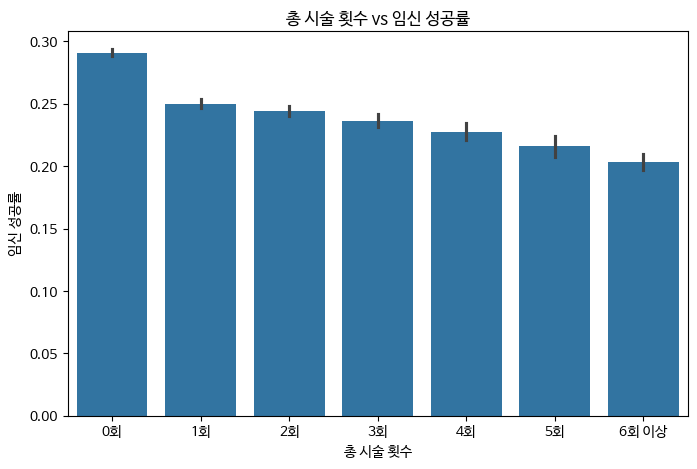

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(
    x=train_data['Ï¥ù ÏãúÏà† ÌöüÏàò'],
    y=train_data['ÏûÑÏã† ÏÑ±Í≥µ Ïó¨Î∂Ä'],
    order=['0Ìöå', '1Ìöå', '2Ìöå', '3Ìöå', '4Ìöå', '5Ìöå', '6Ìöå Ïù¥ÏÉÅ'],
    estimator=lambda x: sum(x)/len(x) # ÏÑ±Í≥µÎ•† Í≥ÑÏÇ∞
)
plt.xlabel("Ï¥ù ÏãúÏà† ÌöüÏàò")
plt.ylabel("ÏûÑÏã† ÏÑ±Í≥µÎ•†")
plt.title("Ï¥ù ÏãúÏà† ÌöüÏàò vs ÏûÑÏã† ÏÑ±Í≥µÎ•†")
plt.show()